In [1]:
# Math and Visualization Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Dataset
df = pd.read_csv('data/raw/FBMarketplace_thai.csv')

In [3]:
df.head()

,status_id,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
0,246675545449582_1649696485147474,video,4/22/2018 6:00,529,512,262,432,92,3,1,1,0,NaN,NaN,NaN,NaN
1,246675545449582_1649426988507757,photo,4/21/2018 22:45,150,0,0,150,0,0,0,0,0,NaN,NaN,NaN,NaN
2,246675545449582_1648730588577397,video,4/21/2018 6:17,227,236,57,204,21,1,1,0,0,NaN,NaN,NaN,NaN
3,246675545449582_1648576705259452,photo,4/21/2018 2:29,111,0,0,111,0,0,0,0,0,NaN,NaN,NaN,NaN
4,246675545449582_1645700502213739,photo,4/18/2018 3:22,213,0,0,204,9,0,0,0,0,NaN,NaN,NaN,NaN


In [4]:
df.shape

(7050, 16)

In [5]:
type(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   status_id         7050 non-null   object 
 1   status_type       7050 non-null   object 
 2   status_published  7050 non-null   object 
 3   num_reactions     7050 non-null   int64  
 4   num_comments      7050 non-null   int64  
 5   num_shares        7050 non-null   int64  
 6   num_likes         7050 non-null   int64  
 7   num_loves         7050 non-null   int64  
 8   num_wows          7050 non-null   int64  
 9   num_hahas         7050 non-null   int64  
 10  num_sads          7050 non-null   int64  
 11  num_angrys        7050 non-null   int64  
 12  Column1           0 non-null      float64
 13  Column2           0 non-null      float64
 14  Column3           0 non-null      float64
 15  Column4           0 non-null      float64
dtypes: float64(4), int64(9), object(3)
memory 

NoneType

In [6]:
df.describe()

,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,Column1,Column2,Column3,Column4
count,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,0.0,0.0,0.0,0.0
mean,230.117163,224.356028,40.022553,215.043121,12.728652,1.289362,0.696454,0.243688,0.113191,NaN,NaN,NaN,NaN
std,462.625309,889.636820,131.599965,449.472357,39.972930,8.719650,3.957183,1.597156,0.726812,NaN,NaN,NaN,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,17.000000,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
50%,59.500000,4.000000,0.000000,58.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
75%,219.000000,23.000000,4.000000,184.750000,3.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN
max,4710.000000,20990.000000,3424.000000,4710.000000,657.000000,278.000000,157.000000,51.000000,31.000000,NaN,NaN,NaN,NaN


In [7]:
df.isnull().sum()

status_id              0
status_type            0
status_published       0
num_reactions          0
num_comments           0
num_shares             0
num_likes              0
num_loves              0
num_wows               0
num_hahas              0
num_sads               0
num_angrys             0
Column1             7050
Column2             7050
Column3             7050
Column4             7050
dtype: int64

Columns- 'Column1', 'Column2', 'Column3', 'Column4', seem to contain no usable value.


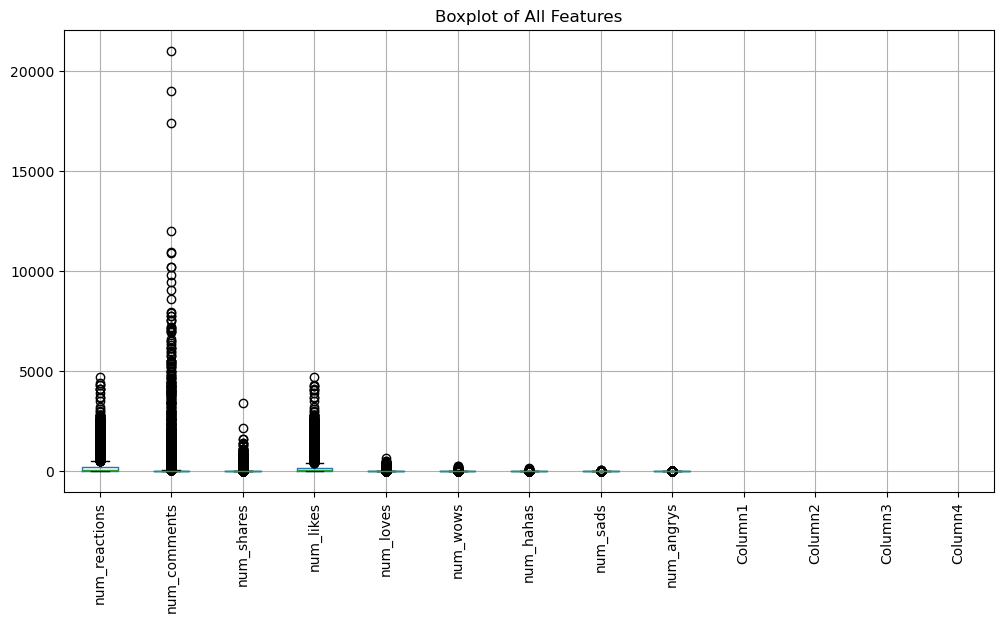

In [8]:
# Outlier detection - numeric columns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.boxplot(rot=90)

plt.title("Boxplot of All Features")
plt.show()

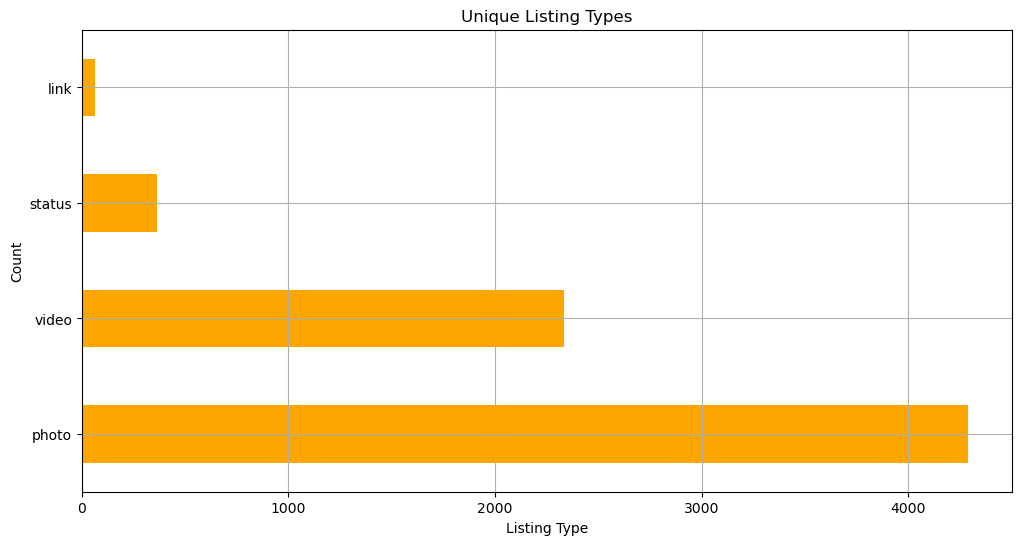

In [9]:
# Types of Listings
df['status_type'].value_counts().plot(
    kind='barh', 
    figsize=(12,6), 
    color = 'orange', 
    grid=True
)

plt.title('Unique Listing Types')
plt.ylabel("Count")
plt.xlabel("Listing Type")

plt.show()

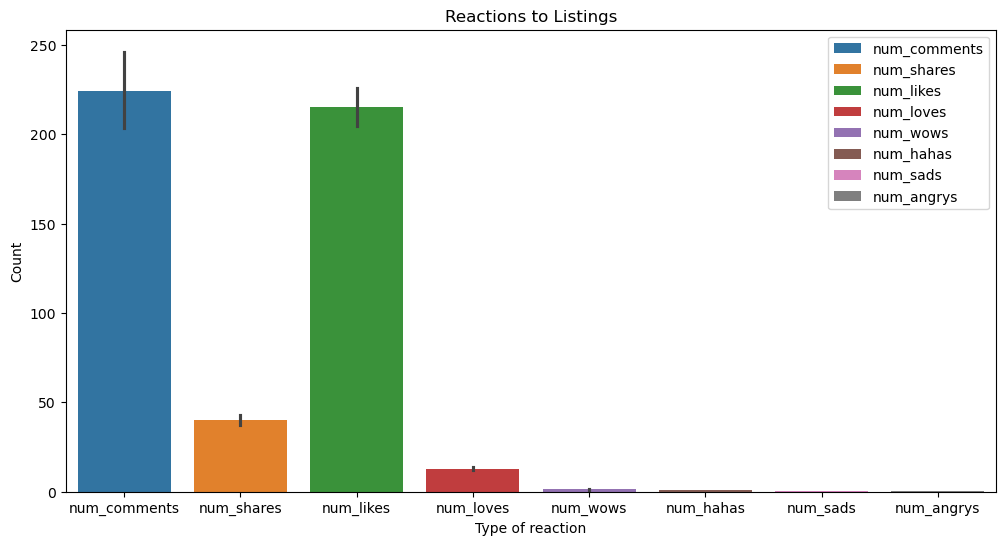

In [10]:
# Count of each Reaction
grouped_data = df[['num_comments', 'num_shares', 'num_likes', 'num_loves', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']]

plt.figure(figsize=(12,6))
sns.barplot(data=grouped_data, legend=True)

plt.title('Reactions to Listings')
plt.xlabel('Type of reaction')
plt.ylabel('Count')

plt.show()


# Influence of Status(Listing) Type

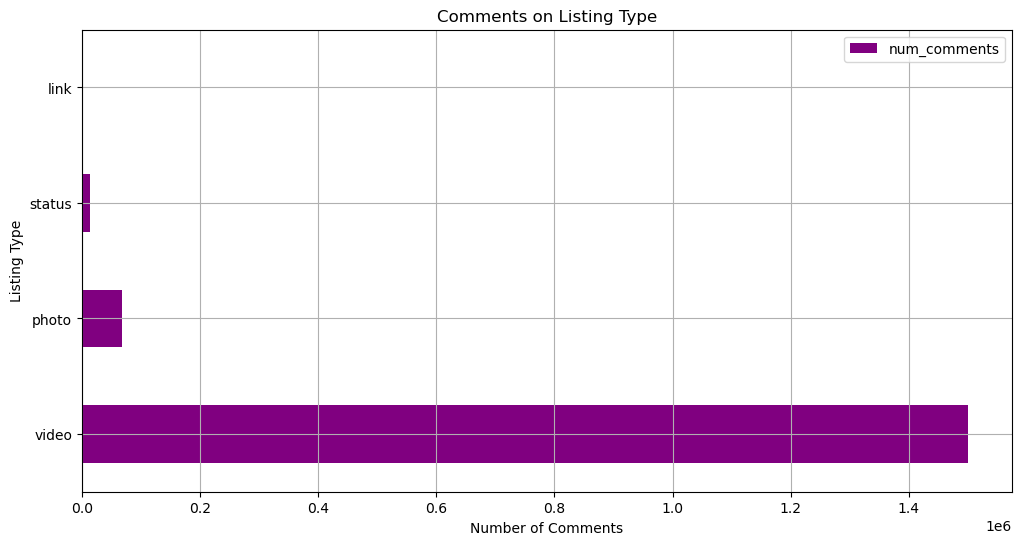

In [11]:
# Comments on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_comments'].sum().sort_values(ascending = False).plot(
    kind='barh', 
    color='purple', 
    grid=True
)

plt.title("Comments on Listing Type")
plt.xlabel('Number of Comments')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

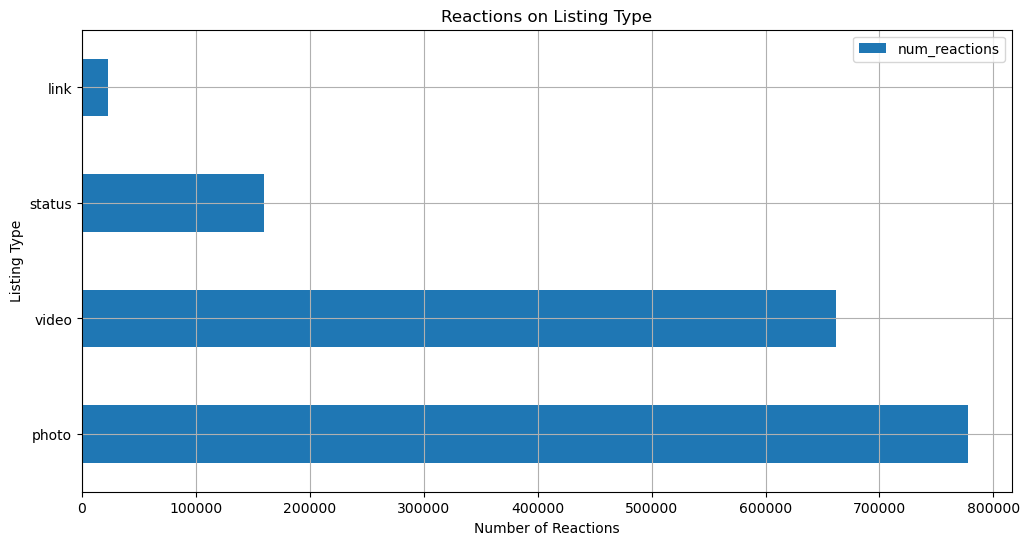

In [12]:
# Reactions on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_reactions'].sum().sort_values(ascending = False).plot(
    kind='barh', 
    grid=True
)

plt.title("Reactions on Listing Type")
plt.xlabel('Number of Reactions')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

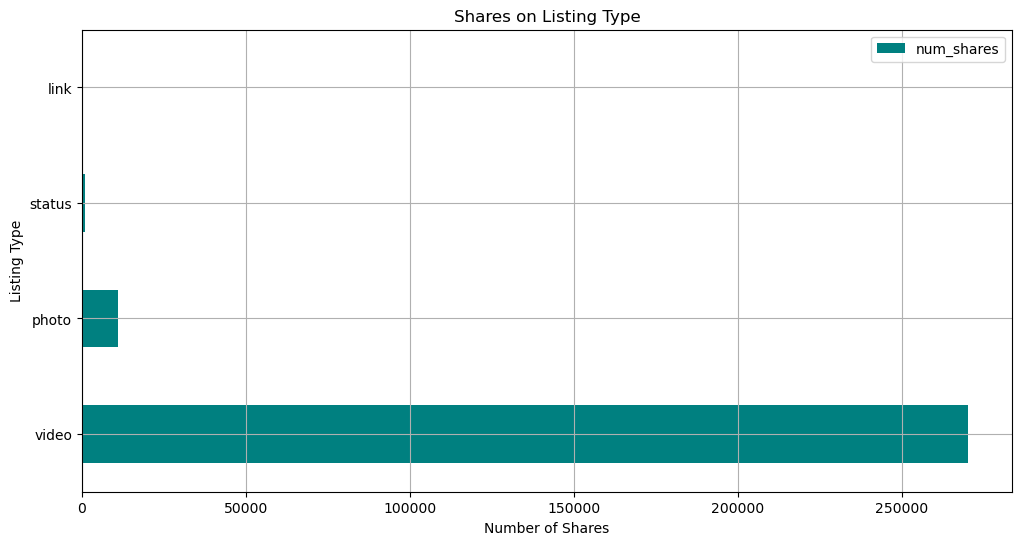

In [13]:
# Shares on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_shares'].sum().sort_values(ascending = False).plot(
    kind='barh', 
    color = 'teal',
    grid=True
)

plt.title("Shares on Listing Type")
plt.xlabel('Number of Shares')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

# Type of Reactions on Status(Listing) Type

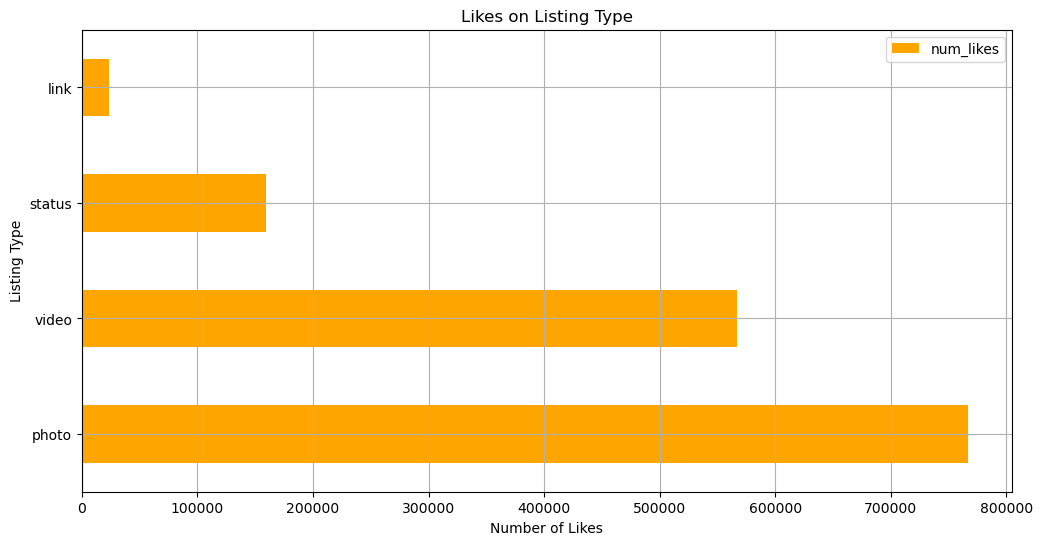

In [14]:
# Num Likes on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_likes'].sum().sort_values(ascending = False).plot(
    kind='barh',
    color='orange', 
    grid=True
)

plt.title("Likes on Listing Type")
plt.xlabel('Number of Likes')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

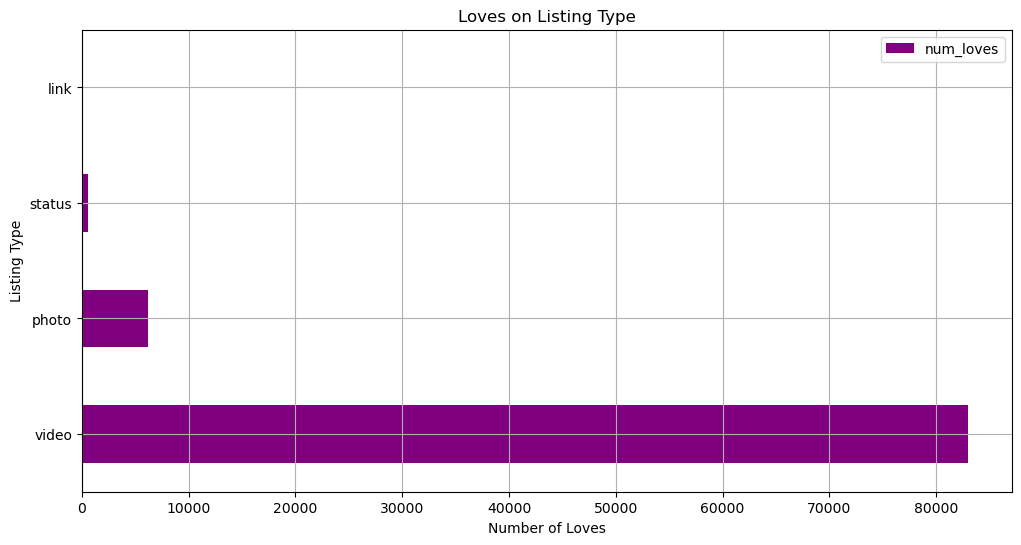

In [15]:
# Num Loves on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_loves'].sum().sort_values(ascending = False).plot(
    kind='barh',
    color='purple', 
    grid=True
)

plt.title("Loves on Listing Type")
plt.xlabel('Number of Loves')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

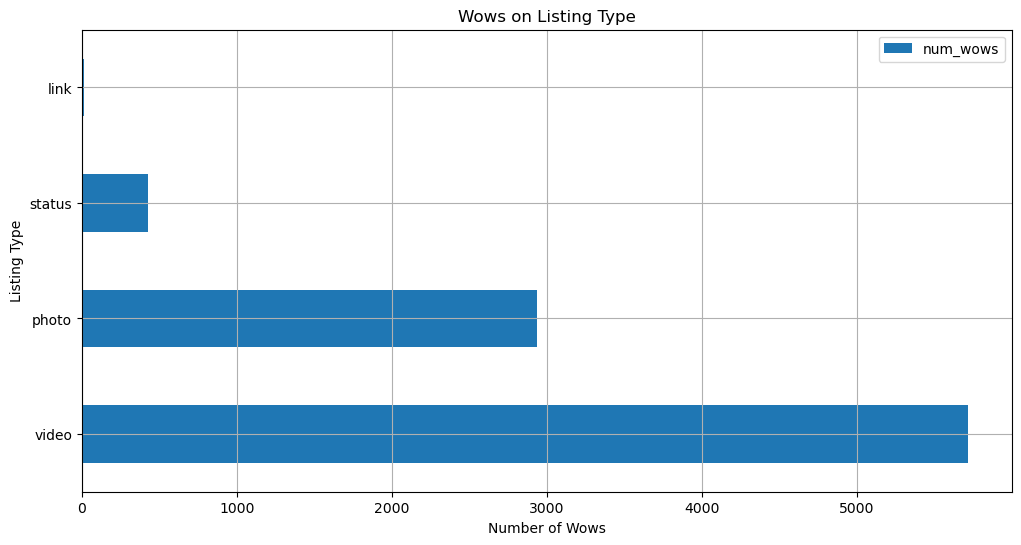

In [16]:
# Num Wows on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_wows'].sum().sort_values(ascending = False).plot(
    kind='barh',
    grid=True
)

plt.title("Wows on Listing Type")
plt.xlabel('Number of Wows')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

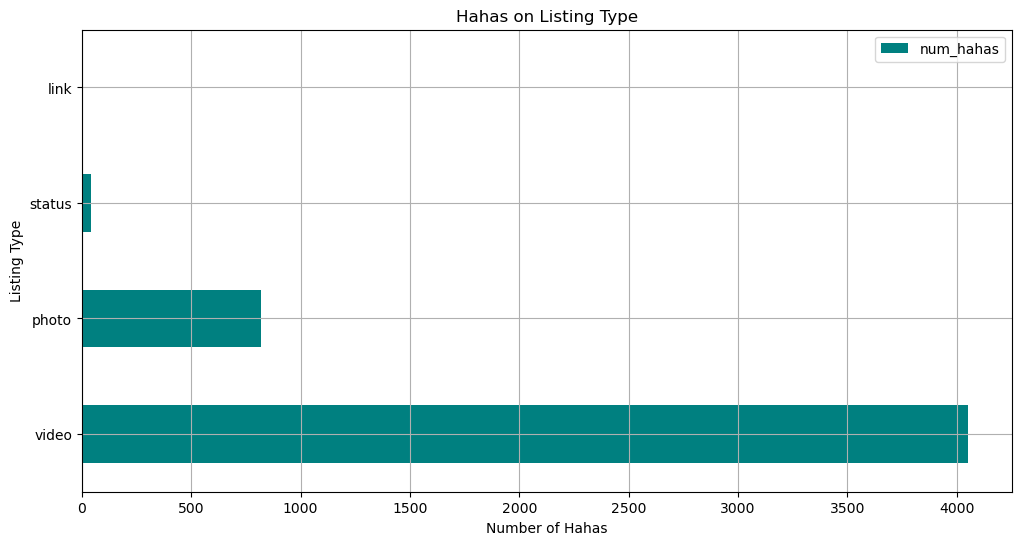

In [17]:
# Num Hahas on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_hahas'].sum().sort_values(ascending = False).plot(
    kind='barh',
    color='teal', 
    grid=True
)

plt.title("Hahas on Listing Type")
plt.xlabel('Number of Hahas')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

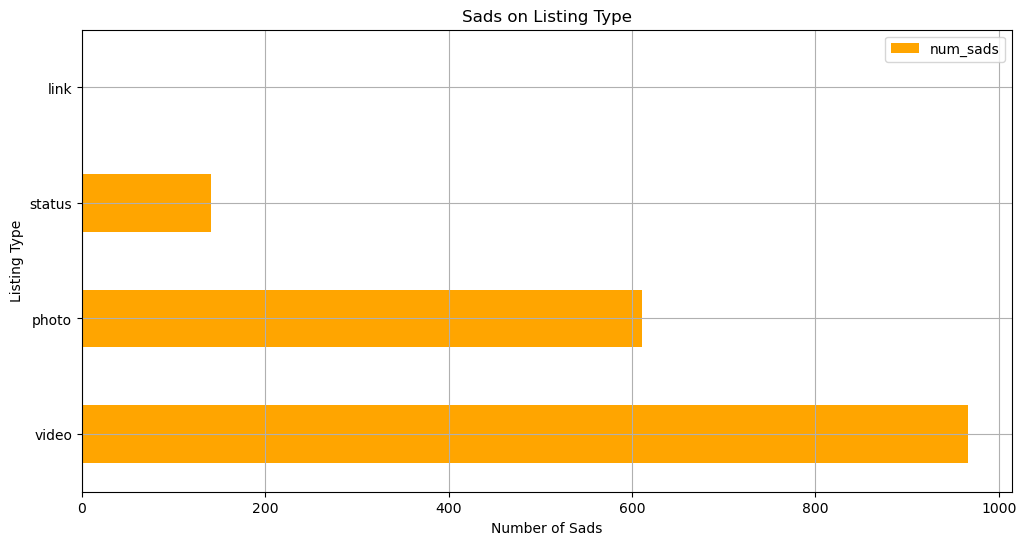

In [18]:
# Num Sads on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_sads'].sum().sort_values(ascending = False).plot(
    kind='barh',
    color='Orange', 
    grid=True
)

plt.title("Sads on Listing Type")
plt.xlabel('Number of Sads')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()

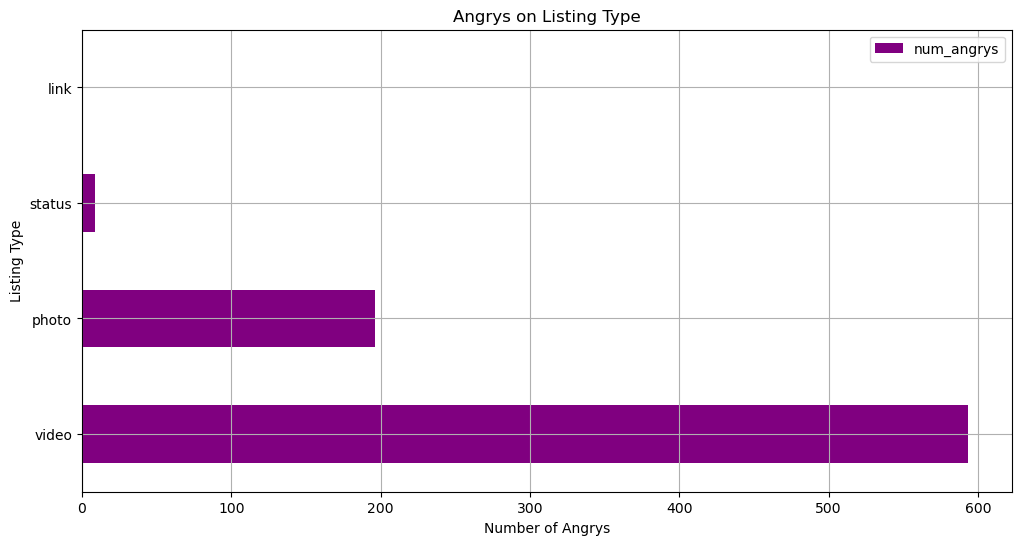

In [19]:
# Num Angrys on Listing Type
plt.figure(figsize=(12,6))

df.groupby('status_type')['num_angrys'].sum().sort_values(ascending = False).plot(
    kind='barh',
    color='purple', 
    grid=True
)

plt.title("Angrys on Listing Type")
plt.xlabel('Number of Angrys')
plt.ylabel('Listing Type')

plt.legend(loc='upper right')

plt.show()